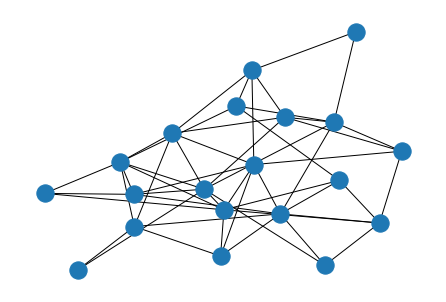

In [10]:
#chapter_7
%matplotlib inline
import networkx as nx
G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [11]:
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'asleep'
    return state

In [12]:
initial_state(G)

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

In [13]:
import random

P_AWAKEN = 0.2
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'asleep':
            if random.random() < P_AWAKEN:
                next_state[node] = 'awake'
    return next_state

In [14]:
test_state = initial_state(G)
state_transition(G, test_state)

{0: 'awake', 4: 'awake', 5: 'awake'}

In [15]:
from simulation import Simulation

sim = Simulation(G, initial_state, state_transition, name='Simple Sim')

In [16]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

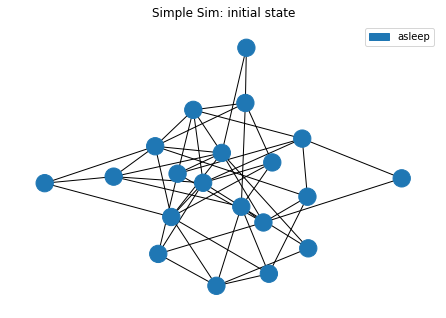

In [18]:
sim.draw()

In [19]:
sim.run()

In [20]:
sim.steps

1

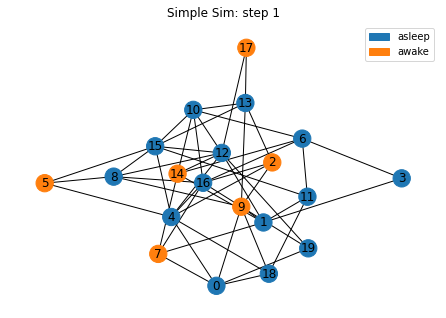

In [22]:
sim.draw(with_labels=True)

In [23]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'awake',
 3: 'asleep',
 4: 'asleep',
 5: 'awake',
 6: 'asleep',
 7: 'awake',
 8: 'asleep',
 9: 'awake',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'awake',
 15: 'asleep',
 16: 'asleep',
 17: 'awake',
 18: 'asleep',
 19: 'asleep'}

In [24]:
sim.run(10)

In [25]:
sim.steps

11

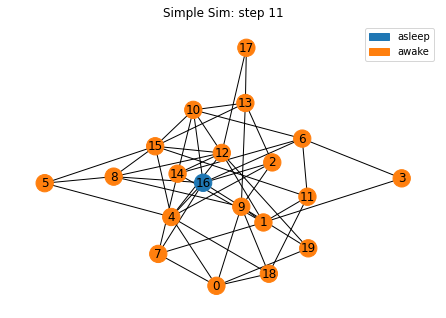

In [28]:
sim.draw(with_labels=True)

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

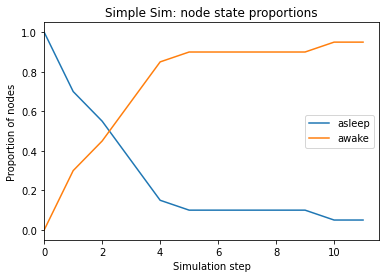

In [29]:
sim.plot()

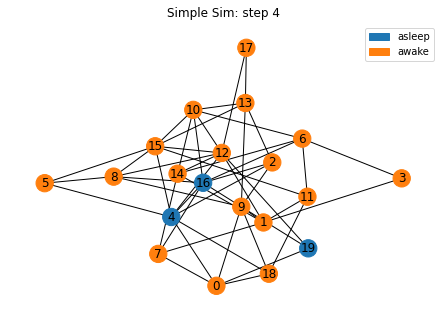

In [30]:
sim.draw(4, with_labels=True)

In [31]:
sim.state(4)

{0: 'awake',
 1: 'awake',
 2: 'awake',
 3: 'awake',
 4: 'asleep',
 5: 'awake',
 6: 'awake',
 7: 'awake',
 8: 'awake',
 9: 'awake',
 10: 'awake',
 11: 'awake',
 12: 'awake',
 13: 'awake',
 14: 'awake',
 15: 'awake',
 16: 'asleep',
 17: 'awake',
 18: 'awake',
 19: 'asleep'}

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

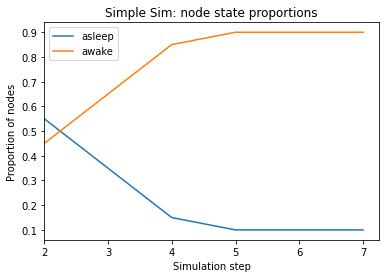

In [32]:
sim.plot(min_step=2, max_step=8)

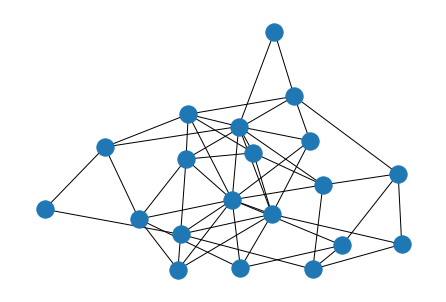

In [33]:
%matplotlib inline
import networkx as nx
G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [34]:
import random
import string

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = random.choice('ABCD')
    return state

In [35]:
initial_state(G)

{0: 'D',
 1: 'C',
 2: 'B',
 3: 'D',
 4: 'A',
 5: 'D',
 6: 'C',
 7: 'A',
 8: 'D',
 9: 'A',
 10: 'B',
 11: 'D',
 12: 'D',
 13: 'D',
 14: 'A',
 15: 'A',
 16: 'C',
 17: 'B',
 18: 'C',
 19: 'A'}

In [36]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        # Caveat: what if the node has no neighbors?
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [37]:
test_state = initial_state(G)
state_transition(G, test_state)

{0: 'A',
 1: 'D',
 2: 'D',
 3: 'A',
 4: 'C',
 5: 'A',
 6: 'A',
 7: 'A',
 8: 'C',
 9: 'A',
 10: 'A',
 11: 'B',
 12: 'D',
 13: 'C',
 14: 'D',
 15: 'D',
 16: 'B',
 17: 'A',
 18: 'A',
 19: 'D'}

In [38]:
import matplotlib.pyplot as plt
sim = Simulation(G, initial_state, state_transition, name='Voter Model')

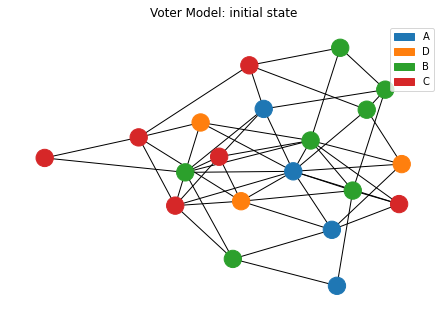

In [39]:
sim.draw()

In [40]:
sim.run(40)

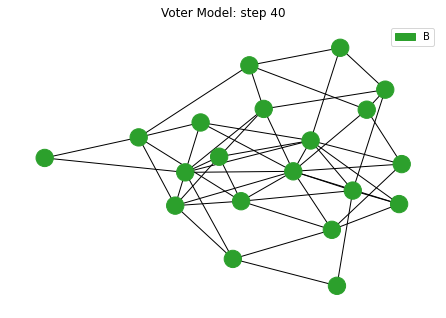

In [41]:
sim.draw()

<AxesSubplot:title={'center':'Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

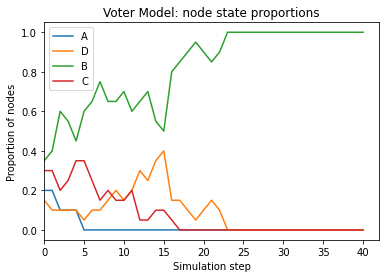

In [42]:
sim.plot()

In [43]:
import random
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [44]:
def state_transition_async(G, current_state):
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

In [45]:
def state_transition_async(G, current_state):
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

<AxesSubplot:title={'center':'Async Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

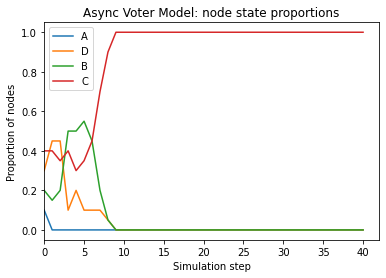

In [46]:
sim = Simulation(G, initial_state, state_transition_async, name='Async Voter Model')
sim.run(40)
sim.plot()

In [47]:
def stop_condition(G, current_state):
    unique_state_values = set(current_state.values())
    is_stopped = len(unique_state_values) <= 1
    return is_stopped

In [48]:
sim = Simulation(G, initial_state, state_transition, stop_condition, name='Voter model')
sim.run(100)

Stop condition met at step 19.


In [49]:
sim.steps

19

<AxesSubplot:title={'center':'Voter model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

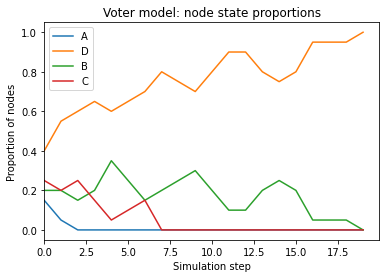

In [50]:
sim.plot()

In [51]:
def state_transition_async_rewiring(G, current_state):
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
            neighbor = random.choice(list(G.neighbors(node)))
            if current_state[node] != current_state[neighbor]:
                G.remove_edge(node, neighbor)
    return current_state

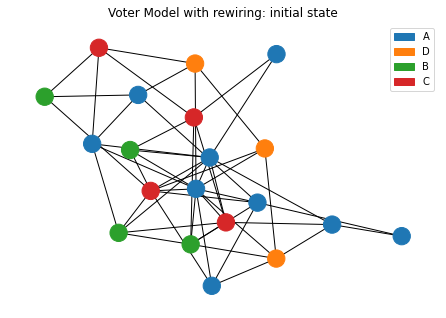

In [52]:
sim = Simulation(G, initial_state, state_transition_async_rewiring, stop_condition,name='Voter Model with rewiring')
sim.draw()

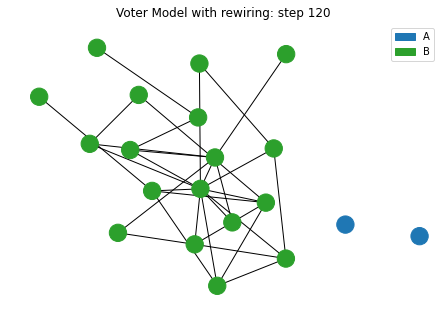

In [55]:
sim.run(40)
sim.draw()

<AxesSubplot:title={'center':'Voter Model with rewiring: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

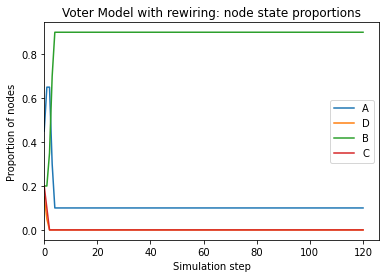

In [56]:
sim.plot()

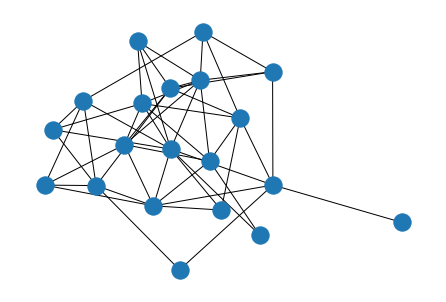

In [58]:
%matplotlib inline
import networkx as nx
G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [59]:
import random
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S'
    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    return state

In [60]:
initial_state(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'I',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S'}

In [61]:
MU = 0.1
BETA = 0.1
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'I':
            if random.random() < MU:
                next_state[node] = 'S'
        else: # current_state[node] == 'S'
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() < BETA:
                        next_state[node] = 'I'

    return next_state

In [62]:
test_state = initial_state(G)
state_transition(G, test_state)

{}

In [63]:
sim = Simulation(G, initial_state, state_transition, name='SIS model')

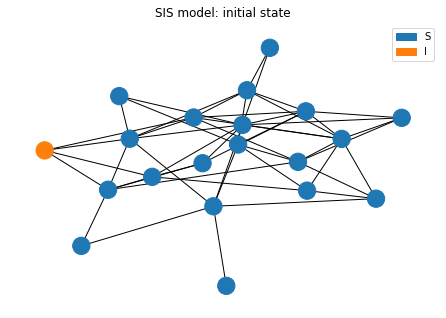

In [65]:
sim.draw()

In [66]:
sim.run(25)

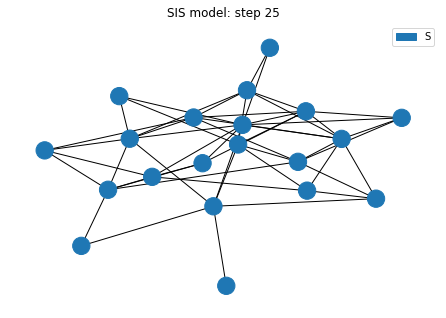

In [69]:
sim.draw()

<AxesSubplot:title={'center':'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

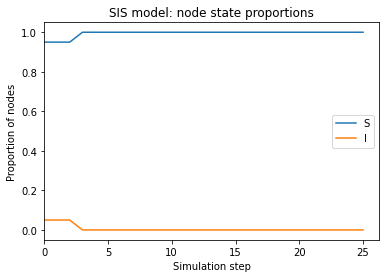

In [70]:
sim.plot()